In [49]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.fft import fft, fftfreq
from scipy.signal import argrelextrema

[4.0, 9.0, 13.0, 17.0, 26.0, 30.0, 34.0, 39.0]
17.5


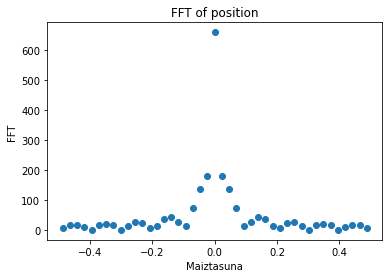

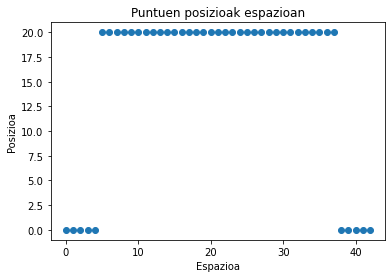

In [51]:
def get_frecuency(xf,ite):
    erroak=[]
    dif=0
    # for local minima
    minima=argrelextrema(xf,np.less)[0]
    for inde in minima:
            erroak.append(ite[inde])
            for i in range(len(erroak)-1):
                dif+=erroak[i+1]-erroak[i]
    print(erroak)
    return dif/len(erroak)


def MeshGenerator(pointDis,MeshSize):
    
    pausux=pointDis
    pausuy=pointDis
    numx=round(MeshSize/pointDis)
    numy=round(MeshSize/pointDis)
    if(np.mod(numx,2)==0):
        numx+=1
    if(np.mod(numy,2)==0):
        numy+=1
    x=np.zeros(numx+10)
    y=np.zeros(numy*numy)
    for i in range(numx):
        x[i+5]=MeshSize/2
        y[i]=pausuy*i-MeshSize/2
    ite=np.zeros(len(x))
    for i in range(len(ite)):
        ite[i]=i
    xf=fft(x)
    xfrek=fftfreq(len(x),1)
    fig,plot=plt.subplots()
    plot.set_xlabel("Maiztasuna")
    plot.set_ylabel("FFT")
    plot.set_title("FFT of position")
    plot.scatter(xfrek,np.abs(xf))
    fig1,plot1=plt.subplots()
    plot1.set_xlabel("Espazioa")
    plot1.set_ylabel("Posizioa")
    plot1.set_title("Puntuen posizioak espazioan")
    plot1.scatter(ite,x)
    f=get_frecuency(np.abs(xf),ite)
    print(f)
pointDis=1.25
MeshSize=40
MeshGenerator(pointDis,MeshSize)